In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, cohen_kappa_score
from collections import Counter

In [22]:
df = pd.read_csv("optimal_features.csv")
print("Columns in dataset:", df.columns.tolist())
print("Shape of dataset:", df.shape)

df

Columns in dataset: ['activity', 'trial', 'student', 'window_idx', 'accelerometer_y_var', 'accelerometer_y_range', 'accelerometer_x_min', 'accelerometer_z_max', 'accelerometer_z_min', 'accelerometer_x_max', 'gyroscope_y_range', 'gravity_z_min', 'gravity_y_max', 'gyroscope_x_range', 'gravity_x_max', 'gravity_x_min', 'gravity_z_median', 'accelerometer_z_iqr', 'accelerometer_mag_iqr', 'gyroscope_z_range', 'gravity_z_range', 'gravity_y_var', 'gravity_y_range', 'gravity_y_rms', 'accelerometer_y_fft_dom_freq_hz', 'gyroscope_z_min', 'gyroscope_z_max', 'gyroscope_x_iqr', 'gyroscope_mag_var', 'accelerometer_z_mean', 'accelerometer_z_median', 'gyroscope_mag_median', 'gravity_yz_corr', 'gyroscope_mag_iqr', 'gyroscope_mag_spec_entropy', 'accelerometer_y_mean', 'gyroscope_z_iqr', 'gravity_y_fft_dom_mag', 'gyroscope_mag_fft_dom_mag']
Shape of dataset: (280, 39)


,activity,trial,student,window_idx,accelerometer_y_var,accelerometer_y_range,accelerometer_x_min,accelerometer_z_max,accelerometer_z_min,accelerometer_x_max,...,accelerometer_z_mean,accelerometer_z_median,gyroscope_mag_median,gravity_yz_corr,gyroscope_mag_iqr,gyroscope_mag_spec_entropy,accelerometer_y_mean,gyroscope_z_iqr,gravity_y_fft_dom_mag,gyroscope_mag_fft_dom_mag
0,Running,1,Student1,0,111.290726,59.504999,-20.189716,17.145107,-15.608119,26.526226,...,-0.338555,-0.534907,2.551617,-0.619924,2.094501,2.996621,-1.803859,2.342641,0.174926,0.581170
1,Running,1,Student1,1,200.973054,66.197945,-22.030649,24.363581,-16.410546,21.532866,...,-0.045726,-1.008013,3.515714,-0.807459,2.163079,3.215959,-1.400786,2.785954,0.192318,0.658153
2,Running,1,Student1,2,196.090209,63.263831,-21.362178,34.748737,-19.019897,25.807364,...,0.083341,-0.365579,2.878282,-0.801005,1.961677,3.180685,-1.235091,2.865281,0.244763,0.531948
3,Running,1,Student1,3,186.035806,65.169250,-20.970864,28.004951,-14.555744,24.187065,...,-0.580672,-0.646861,2.822911,-0.779718,1.754324,3.280868,-1.701901,3.113138,0.151836,0.446779
4,Running,1,Student2,0,16.549425,30.156437,-14.961006,3.083043,-13.045682,4.218154,...,-6.764906,-6.732165,1.468382,0.941731,1.638890,2.281000,-3.013525,0.836224,1.043558,0.365667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Walking,4,Student1,6,8.101238,16.190116,-5.932311,8.155795,-6.910718,9.812648,...,-0.325399,-0.360369,1.375236,-0.439030,1.140190,2.367397,-0.354064,0.902461,0.049947,0.362057
276,Walking,4,Student1,7,11.486397,19.590601,-6.194418,7.169597,-8.400428,10.021964,...,-0.097370,0.042287,1.315313,-0.489525,1.054237,2.344101,-0.602792,0.886858,0.048845,0.397123
277,Walking,4,Student1,8,11.340003,18.246516,-6.061180,7.184226,-6.121468,10.804960,...,-0.513871,-0.694103,1.264322,-0.389445,0.949132,2.538802,-0.227021,0.876336,0.039362,0.341533
278,Walking,4,Student1,9,7.009378,15.007396,-6.335316,5.681502,-6.723723,9.080297,...,-0.195188,-0.123074,1.310870,-0.387228,1.448386,2.195533,-0.636375,0.979755,0.052016,0.362802


In [23]:
import pandas as pd
import numpy as np
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score, f1_score, cohen_kappa_score,
    confusion_matrix, classification_report
)

# =========================================================
# 0) LOAD & PREPARE DATA
# =========================================================
df = pd.read_csv("optimal_features.csv")

# Label = first column; Features = columns from index 4 onward (skip the first 4 metadata columns)
y = df.iloc[:, 0].astype(str).values
X_all = df.iloc[:, 4:]
# Keep only numeric feature columns
X = X_all.select_dtypes(include=[np.number]).to_numpy()
feature_names = X_all.select_dtypes(include=[np.number]).columns

print("Columns in dataset:", df.columns.tolist())
print("Shape of dataset:", df.shape)
print(f"Using label column: {df.columns[0]!r}")
print(f"Dropped metadata columns: {df.columns[:4].tolist()}")
print(f"Feature columns kept (numeric only): {len(feature_names)}")

print(f"\nTotal samples: {len(X)}")
print(f"Feature count: {X.shape[1]}")
print(f"Class distribution: {Counter(y)}")

# Consistent split for all models
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=33, stratify=y
)

# Utility: unified metrics printer
def evaluate_and_print(y_true, y_pred, model_name, labels_all=None):
    acc = accuracy_score(y_true, y_pred)
    f1m = f1_score(y_true, y_pred, average="macro")
    kappa = cohen_kappa_score(y_true, y_pred)

    if labels_all is None:
        labels_all = np.unique(np.concatenate([y_true, y_pred]))
    cm = confusion_matrix(y_true, y_pred, labels=labels_all)
    cm_df = pd.DataFrame(cm, index=labels_all, columns=labels_all)

    print("\n" + "="*80)
    print(f"{model_name} — Evaluation")
    print(f"Accuracy       : {acc:.4f}")
    print(f"F1-Score Macro : {f1m:.4f}")
    print(f"Cohen's Kappa  : {kappa:.4f}")
    print("\nConfusion Matrix:")
    print(cm_df)
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, zero_division=0))
    return acc, f1m, kappa, cm_df

Columns in dataset: ['activity', 'trial', 'student', 'window_idx', 'accelerometer_y_var', 'accelerometer_y_range', 'accelerometer_x_min', 'accelerometer_z_max', 'accelerometer_z_min', 'accelerometer_x_max', 'gyroscope_y_range', 'gravity_z_min', 'gravity_y_max', 'gyroscope_x_range', 'gravity_x_max', 'gravity_x_min', 'gravity_z_median', 'accelerometer_z_iqr', 'accelerometer_mag_iqr', 'gyroscope_z_range', 'gravity_z_range', 'gravity_y_var', 'gravity_y_range', 'gravity_y_rms', 'accelerometer_y_fft_dom_freq_hz', 'gyroscope_z_min', 'gyroscope_z_max', 'gyroscope_x_iqr', 'gyroscope_mag_var', 'accelerometer_z_mean', 'accelerometer_z_median', 'gyroscope_mag_median', 'gravity_yz_corr', 'gyroscope_mag_iqr', 'gyroscope_mag_spec_entropy', 'accelerometer_y_mean', 'gyroscope_z_iqr', 'gravity_y_fft_dom_mag', 'gyroscope_mag_fft_dom_mag']
Shape of dataset: (280, 39)
Using label column: 'activity'
Dropped metadata columns: ['activity', 'trial', 'student', 'window_idx']
Feature columns kept (numeric only):

In [24]:
# =========================================================
# 1) LOGISTIC REGRESSION (Multinomial)
#    (with scaling)
# =========================================================
scaler_lr = StandardScaler()
X_train_lr = scaler_lr.fit_transform(X_train)
X_test_lr  = scaler_lr.transform(X_test)

lr = LogisticRegression(
    penalty="l2",
    C=1.0,
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=500,
    random_state=33
)

print("\n" + "#"*80)
print("Training: Logistic Regression (Multinomial)")
lr.fit(X_train_lr, y_train)
y_pred_lr = lr.predict(X_test_lr)

acc_lr, f1_lr, kappa_lr, cm_lr = evaluate_and_print(y_test, y_pred_lr, "Logistic Regression (Multinomial)", labels_all=np.unique(y))

# Feature weights (per class)
coef_df = pd.DataFrame(lr.coef_, columns=feature_names, index=lr.classes_)
print("\nTop 5 absolute-weight features per class (Logistic Regression):")
for cls in lr.classes_:
    top5 = coef_df.loc[cls].abs().sort_values(ascending=False).head(5)
    print(f"\nClass: {cls}")
    print(top5)


################################################################################
Training: Logistic Regression (Multinomial)

Logistic Regression (Multinomial) — Evaluation
Accuracy       : 0.9286
F1-Score Macro : 0.9247
Cohen's Kappa  : 0.9105

Confusion Matrix:
         Running  Sit  Stairs  Stand  Walking
Running       17    0       0      0        0
Sit            0   14       0      1        0
Stairs         0    0      16      0        0
Stand          0    3       0     12        0
Walking        0    0       2      0       19

Classification Report:
              precision    recall  f1-score   support

     Running       1.00      1.00      1.00        17
         Sit       0.82      0.93      0.88        15
      Stairs       0.89      1.00      0.94        16
       Stand       0.92      0.80      0.86        15
     Walking       1.00      0.90      0.95        21

    accuracy                           0.93        84
   macro avg       0.93      0.93      0.92        84
w

c:\Users\Silvia\Desktop\tue\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [25]:
# =========================================================
# 2) DECISION TREE
#    (no scaling)
# =========================================================
dt = DecisionTreeClassifier(
    criterion="gini",
    max_depth=None,
    random_state=33
)

print("\n" + "#"*80)
print("Training: Decision Tree")
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

acc_dt, f1_dt, kappa_dt, cm_dt = evaluate_and_print(y_test, y_pred_dt, "Decision Tree", labels_all=np.unique(y))

# Feature importances
importances = pd.Series(dt.feature_importances_, index=feature_names)
top10_dt = importances.sort_values(ascending=False).head(10)
print("\nTop 10 Decision Tree feature importances:")
print(top10_dt)


################################################################################
Training: Decision Tree

Decision Tree — Evaluation
Accuracy       : 0.8810
F1-Score Macro : 0.8643
Cohen's Kappa  : 0.8505

Confusion Matrix:
         Running  Sit  Stairs  Stand  Walking
Running       17    0       0      0        0
Sit            0   12       0      3        0
Stairs         0    0      16      0        0
Stand          0    7       0      8        0
Walking        0    0       0      0       21

Classification Report:
              precision    recall  f1-score   support

     Running       1.00      1.00      1.00        17
         Sit       0.63      0.80      0.71        15
      Stairs       1.00      1.00      1.00        16
       Stand       0.73      0.53      0.62        15
     Walking       1.00      1.00      1.00        21

    accuracy                           0.88        84
   macro avg       0.87      0.87      0.86        84
weighted avg       0.89      0.88      0.

In [26]:
# =========================================================
# 3) GAUSSIAN NAIVE BAYES
#    (no scaling strictly required; NB is robust to scale)
# =========================================================
gnb = GaussianNB()

print("\n" + "#"*80)
print("Training: Gaussian Naive Bayes")
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

acc_gnb, f1_gnb, kappa_gnb, cm_gnb = evaluate_and_print(y_test, y_pred_gnb, "Gaussian Naive Bayes", labels_all=np.unique(y))



################################################################################
Training: Gaussian Naive Bayes

Gaussian Naive Bayes — Evaluation
Accuracy       : 0.8810
F1-Score Macro : 0.8737
Cohen's Kappa  : 0.8507

Confusion Matrix:
         Running  Sit  Stairs  Stand  Walking
Running       17    0       0      0        0
Sit            0   11       0      4        0
Stairs         0    0      15      0        1
Stand          0    3       0     12        0
Walking        0    0       2      0       19

Classification Report:
              precision    recall  f1-score   support

     Running       1.00      1.00      1.00        17
         Sit       0.79      0.73      0.76        15
      Stairs       0.88      0.94      0.91        16
       Stand       0.75      0.80      0.77        15
     Walking       0.95      0.90      0.93        21

    accuracy                           0.88        84
   macro avg       0.87      0.88      0.87        84
weighted avg       0.88    

In [27]:
# =========================================================
# 4) K-NEAREST NEIGHBORS
#    (with scaling)
# =========================================================
scaler_knn = StandardScaler()
X_train_knn = scaler_knn.fit_transform(X_train)
X_test_knn  = scaler_knn.transform(X_test)

knn = KNeighborsClassifier(
    n_neighbors=5,
    weights="uniform"
)

print("\n" + "#"*80)
print("Training: K-Nearest Neighbors (k=5)")
knn.fit(X_train_knn, y_train)
y_pred_knn = knn.predict(X_test_knn)

acc_knn, f1_knn, kappa_knn, cm_knn = evaluate_and_print(y_test, y_pred_knn, "K-Nearest Neighbors (k=5)", labels_all=np.unique(y))



################################################################################
Training: K-Nearest Neighbors (k=5)

K-Nearest Neighbors (k=5) — Evaluation
Accuracy       : 0.9286
F1-Score Macro : 0.9223
Cohen's Kappa  : 0.9104

Confusion Matrix:
         Running  Sit  Stairs  Stand  Walking
Running       17    0       0      0        0
Sit            0   13       0      2        0
Stairs         0    0      16      0        0
Stand          0    3       0     12        0
Walking        0    0       1      0       20

Classification Report:
              precision    recall  f1-score   support

     Running       1.00      1.00      1.00        17
         Sit       0.81      0.87      0.84        15
      Stairs       0.94      1.00      0.97        16
       Stand       0.86      0.80      0.83        15
     Walking       1.00      0.95      0.98        21

    accuracy                           0.93        84
   macro avg       0.92      0.92      0.92        84
weighted avg     

In [28]:
# =========================================================
# 5) SUMMARY TABLE (optional but handy)
# =========================================================
summary = pd.DataFrame({
    "Model": [
        "Logistic Regression (Multinomial)",
        "Decision Tree",
        "Gaussian Naive Bayes",
        "K-Nearest Neighbors (k=5)"
    ],
    "Accuracy": [acc_lr, acc_dt, acc_gnb, acc_knn],
    "F1 Macro": [f1_lr, f1_dt, f1_gnb, f1_knn],
    "Cohen's Kappa": [kappa_lr, kappa_dt, kappa_gnb, kappa_knn]
})
print("\n" + "#"*80)
print("Model Comparison Summary")
print(summary.to_string(index=False))


################################################################################
Model Comparison Summary
                            Model  Accuracy  F1 Macro  Cohen's Kappa
Logistic Regression (Multinomial)  0.928571  0.924664       0.910480
                    Decision Tree  0.880952  0.864253       0.850534
             Gaussian Naive Bayes  0.880952  0.873747       0.850667
        K-Nearest Neighbors (k=5)  0.928571  0.922321       0.910400


# Unsupervised Learning

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (
    silhouette_score, adjusted_rand_score, normalized_mutual_info_score,
    accuracy_score, cohen_kappa_score, f1_score
)
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.optimize import linear_sum_assignment
import skfuzzy as fuzz

In [30]:
df

,activity,trial,student,window_idx,accelerometer_y_var,accelerometer_y_range,accelerometer_x_min,accelerometer_z_max,accelerometer_z_min,accelerometer_x_max,...,accelerometer_z_mean,accelerometer_z_median,gyroscope_mag_median,gravity_yz_corr,gyroscope_mag_iqr,gyroscope_mag_spec_entropy,accelerometer_y_mean,gyroscope_z_iqr,gravity_y_fft_dom_mag,gyroscope_mag_fft_dom_mag
0,Running,1,Student1,0,111.290726,59.504999,-20.189716,17.145107,-15.608119,26.526226,...,-0.338555,-0.534907,2.551617,-0.619924,2.094501,2.996621,-1.803859,2.342641,0.174926,0.581170
1,Running,1,Student1,1,200.973054,66.197945,-22.030649,24.363581,-16.410546,21.532866,...,-0.045726,-1.008013,3.515714,-0.807459,2.163079,3.215959,-1.400786,2.785954,0.192318,0.658153
2,Running,1,Student1,2,196.090209,63.263831,-21.362178,34.748737,-19.019897,25.807364,...,0.083341,-0.365579,2.878282,-0.801005,1.961677,3.180685,-1.235091,2.865281,0.244763,0.531948
3,Running,1,Student1,3,186.035806,65.169250,-20.970864,28.004951,-14.555744,24.187065,...,-0.580672,-0.646861,2.822911,-0.779718,1.754324,3.280868,-1.701901,3.113138,0.151836,0.446779
4,Running,1,Student2,0,16.549425,30.156437,-14.961006,3.083043,-13.045682,4.218154,...,-6.764906,-6.732165,1.468382,0.941731,1.638890,2.281000,-3.013525,0.836224,1.043558,0.365667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Walking,4,Student1,6,8.101238,16.190116,-5.932311,8.155795,-6.910718,9.812648,...,-0.325399,-0.360369,1.375236,-0.439030,1.140190,2.367397,-0.354064,0.902461,0.049947,0.362057
276,Walking,4,Student1,7,11.486397,19.590601,-6.194418,7.169597,-8.400428,10.021964,...,-0.097370,0.042287,1.315313,-0.489525,1.054237,2.344101,-0.602792,0.886858,0.048845,0.397123
277,Walking,4,Student1,8,11.340003,18.246516,-6.061180,7.184226,-6.121468,10.804960,...,-0.513871,-0.694103,1.264322,-0.389445,0.949132,2.538802,-0.227021,0.876336,0.039362,0.341533
278,Walking,4,Student1,9,7.009378,15.007396,-6.335316,5.681502,-6.723723,9.080297,...,-0.195188,-0.123074,1.310870,-0.387228,1.448386,2.195533,-0.636375,0.979755,0.052016,0.362802


In [31]:

# ----------------------------
# 1) LOAD & PREPARE DATA
# ----------------------------

# Labels (for evaluation only)
y = df.iloc[:, 0].astype(str).values
classes = np.unique(y)
n_clusters = len(classes)

X_all = df.iloc[:, 4:]
X = X_all.select_dtypes(include=[np.number]).to_numpy()
feature_names = X_all.select_dtypes(include=[np.number]).columns

print("Dataset shape:", X.shape)
print("Classes (for evaluation only):", classes)
print("Class distribution:", Counter(y))

Dataset shape: (280, 35)
Classes (for evaluation only): ['Running' 'Sit' 'Stairs' 'Stand' 'Walking']
Class distribution: Counter({'Walking': 69, 'Running': 57, 'Stairs': 54, 'Sit': 50, 'Stand': 50})


In [32]:
# ----------------------------
# 2) SCALE + PCA (for visualization only)
# ----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=33)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance by (PC1, PC2):", np.round(pca.explained_variance_ratio_, 4))

# ----------------------------
# Helpers
# ----------------------------
def hungarian_align(y_true, y_pred):
    """
    Map cluster IDs to ground-truth labels using the Hungarian algorithm.
    Returns y_pred_mapped (same shape as y_pred).
    """
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    labels_true = np.unique(y_true)
    labels_pred = np.unique(y_pred)

    # Contingency table: rows=true labels, cols=predicted clusters
    contingency = pd.crosstab(
        pd.Series(y_true, name="true"),
        pd.Series(y_pred, name="pred"),
        dropna=False
    )
    contingency = contingency.reindex(index=labels_true, columns=labels_pred, fill_value=0)

    # Hungarian on cost = -counts (maximize overlap)
    cost = -contingency.to_numpy()
    row_ind, col_ind = linear_sum_assignment(cost)

    # Build mapping for assigned columns
    mapping = {}
    for r, c in zip(row_ind, col_ind):
        true_lab = contingency.index[r]
        pred_lab = contingency.columns[c]
        mapping[pred_lab] = true_lab

    # Map any leftover pred clusters to their majority true label
    leftover_pred = set(labels_pred) - set(mapping.keys())
    for pl in leftover_pred:
        col = contingency[pl]
        mapping[pl] = col.idxmax()

    return np.array([mapping[p] for p in y_pred])

def eval_unsupervised(name, y_true, y_pred_raw):
    """
    Unsupervised metrics that are label-permutation invariant:
    - Silhouette (uses X_scaled)
    - ARI
    - NMI
    """
    uniq = np.unique(y_pred_raw)
    if len(uniq) > 1:
        sil = silhouette_score(X_scaled, y_pred_raw)
    else:
        sil = np.nan
    ari = adjusted_rand_score(y_true, y_pred_raw)
    nmi = normalized_mutual_info_score(y_true, y_pred_raw)
    print(f"\n--- {name} (Unsupervised metrics) ---")
    print(f"Silhouette : {sil:.4f}" if sil == sil else "Silhouette : n/a (single cluster)")
    print(f"ARI        : {ari:.4f}")
    print(f"NMI        : {nmi:.4f}")
    return sil, ari, nmi

def eval_supervised_style(name, y_true, y_pred_raw):
    """
    Supervised-style metrics after aligning clusters to labels:
    - Accuracy
    - Cohen's Kappa
    - Macro F1
    Returns mapped predictions too.
    """
    y_pred_aligned = hungarian_align(y_true, y_pred_raw)
    acc = accuracy_score(y_true, y_pred_aligned)
    kappa = cohen_kappa_score(y_true, y_pred_aligned)
    f1m = f1_score(y_true, y_pred_aligned, average="macro")
    print(f"\n--- {name} (Supervised-style metrics) ---")
    print(f"Accuracy       : {acc:.4f}")
    print(f"Cohen's Kappa  : {kappa:.4f}")
    print(f"F1-Score (Macro): {f1m:.4f}")
    return acc, kappa, f1m, y_pred_aligned

Explained variance by (PC1, PC2): [0.5662 0.1112]


In [33]:
# ----------------------------
# 3) K-MEANS (hard)
# ----------------------------
kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=33)
km_labels = kmeans.fit_predict(X_scaled)

# Unsupervised metrics
km_sil, km_ari, km_nmi = eval_unsupervised("K-Means", y, km_labels)
# Supervised-style metrics
acc_km, kappa_km, f1_km, y_km_aligned = eval_supervised_style("K-Means", y, km_labels)


--- K-Means (Unsupervised metrics) ---
Silhouette : 0.4204
ARI        : 0.5007
NMI        : 0.6651

--- K-Means (Supervised-style metrics) ---
Accuracy       : 0.5321
Cohen's Kappa  : 0.4063
F1-Score (Macro): 0.4652


In [34]:
# ----------------------------
# 4) GAUSSIAN MIXTURE (soft → hard)
# ----------------------------
gmm = GaussianMixture(n_components=n_clusters, covariance_type="full", random_state=33, n_init=5)
gmm.fit(X_scaled)
gmm_probs = gmm.predict_proba(X_scaled)
gmm_labels = np.argmax(gmm_probs, axis=1)

# Unsupervised metrics
gmm_sil, gmm_ari, gmm_nmi = eval_unsupervised("Gaussian Mixture (GMM)", y, gmm_labels)
# Supervised-style metrics
acc_gmm, kappa_gmm, f1_gmm, y_gmm_aligned = eval_supervised_style("Gaussian Mixture (GMM)", y, gmm_labels)



--- Gaussian Mixture (GMM) (Unsupervised metrics) ---
Silhouette : 0.4204
ARI        : 0.5007
NMI        : 0.6651

--- Gaussian Mixture (GMM) (Supervised-style metrics) ---
Accuracy       : 0.5321
Cohen's Kappa  : 0.4063
F1-Score (Macro): 0.4652


In [35]:
# ----------------------------
# 5) FUZZY C-MEANS (soft → hard)
# ----------------------------
data_T = X_scaled.T  # skfuzzy expects (features, samples)
cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    data=data_T,
    c=n_clusters,
    m=2.0,
    error=1e-5,
    maxiter=1000,
    init=None,
    seed=33
)
fcm_labels = np.argmax(u, axis=0)

# Unsupervised metrics
fcm_sil, fcm_ari, fcm_nmi = eval_unsupervised("Fuzzy C-Means", y, fcm_labels)
print(f"FCM partition coefficient (FPC): {fpc:.4f}")  # diagnostic
# Supervised-style metrics
acc_fcm, kappa_fcm, f1_fcm, y_fcm_aligned = eval_supervised_style("Fuzzy C-Means", y, fcm_labels)



--- Fuzzy C-Means (Unsupervised metrics) ---
Silhouette : 0.2785
ARI        : 0.5725
NMI        : 0.6758
FCM partition coefficient (FPC): 0.4116

--- Fuzzy C-Means (Supervised-style metrics) ---
Accuracy       : 0.7286
Cohen's Kappa  : 0.6608
F1-Score (Macro): 0.7181


In [36]:
# ----------------------------
# 6) SUMMARY TABLES
# ----------------------------
unsup_summary = pd.DataFrame([
    ("K-Means", km_sil,  km_ari,  km_nmi),
    ("GMM",     gmm_sil, gmm_ari, gmm_nmi),
    ("FCM",     fcm_sil, fcm_ari, fcm_nmi),
], columns=["Method", "Silhouette", "ARI", "NMI"])

sup_style_summary = pd.DataFrame([
    ("K-Means", acc_km,  kappa_km,  f1_km),
    ("GMM",     acc_gmm, kappa_gmm, f1_gmm),
    ("FCM",     acc_fcm, kappa_fcm, f1_fcm),
], columns=["Method", "Accuracy", "Cohen's Kappa", "F1-Score (Macro)"])

print("\n================ Unsupervised Metrics Summary ================")
print(unsup_summary.to_string(index=False))
print("\n================ Supervised-Style Metrics Summary ================")
print(sup_style_summary.to_string(index=False))


================ Unsupervised Metrics Summary ================
 Method  Silhouette      ARI      NMI
K-Means    0.420366 0.500684 0.665066
    GMM    0.420366 0.500684 0.665066
    FCM    0.278497 0.572495 0.675845

================ Supervised-Style Metrics Summary ================
 Method  Accuracy  Cohen's Kappa  F1-Score (Macro)
K-Means  0.532143       0.406309          0.465198
    GMM  0.532143       0.406309          0.465198
    FCM  0.728571       0.660839          0.718130


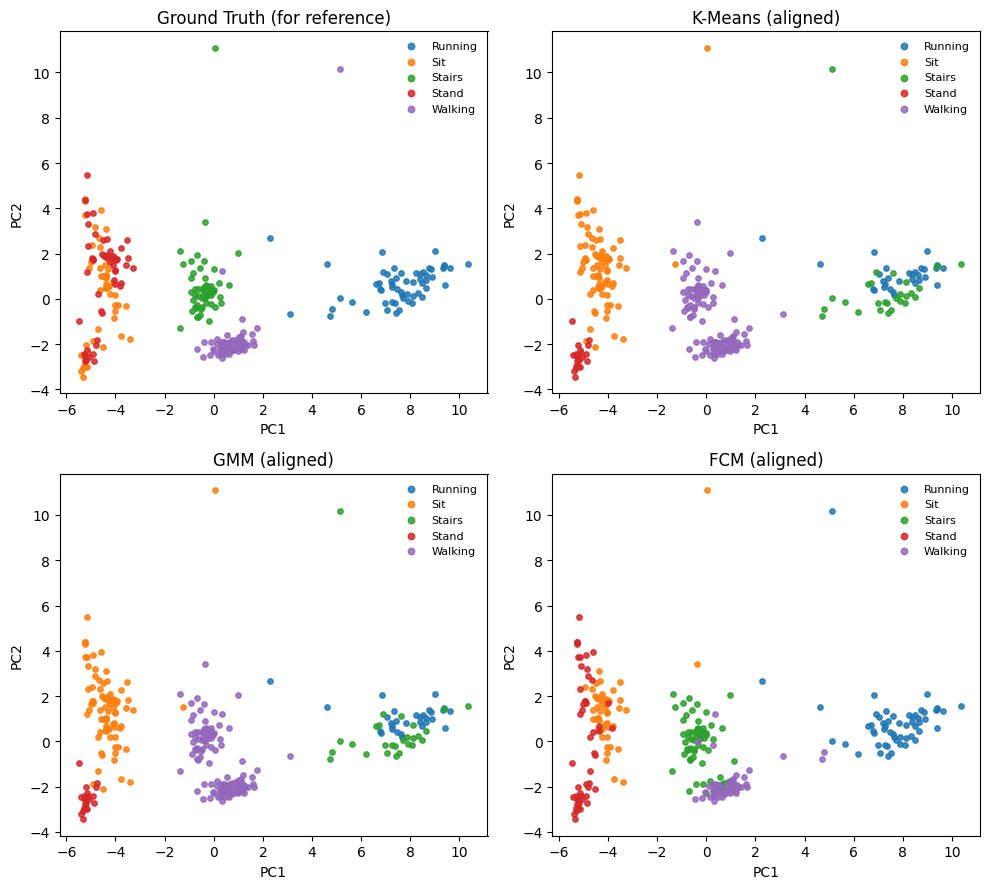

In [37]:
# ----------------------------
# 7) PCA VISUALIZATION (2D): Ground truth vs aligned cluster labels
# ----------------------------
fig, axes = plt.subplots(2, 2, figsize=(10, 9))
axes = axes.ravel()

def scatter(ax, Xpca, labels, title):
    for lab in np.unique(labels):
        idx = labels == lab
        ax.scatter(Xpca[idx, 0], Xpca[idx, 1], s=15, alpha=0.85, label=str(lab))
    ax.set_title(title)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.legend(markerscale=1.2, fontsize=8, loc="best", frameon=False)

scatter(axes[0], X_pca, y,              "Ground Truth (for reference)")
scatter(axes[1], X_pca, y_km_aligned,   "K-Means (aligned)")
scatter(axes[2], X_pca, y_gmm_aligned,  "GMM (aligned)")
scatter(axes[3], X_pca, y_fcm_aligned,  "FCM (aligned)")

plt.tight_layout()
plt.show()